In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
sns.set()

In [78]:
import seaborn as sns


In [79]:
boston = pd.read_csv('Boston.csv')

In [80]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [81]:
boston.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [82]:
boston.drop('Unnamed: 0',axis = 1,inplace = True)

In [83]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [84]:
df_corr = boston.corr()
pd.DataFrame(df_corr['medv'])

,medv
crim,-0.388305
zn,0.360445
indus,-0.483725
chas,0.175260
nox,-0.427321
rm,0.695360
age,-0.376955
dis,0.249929
rad,-0.381626
tax,-0.468536


<AxesSubplot:>

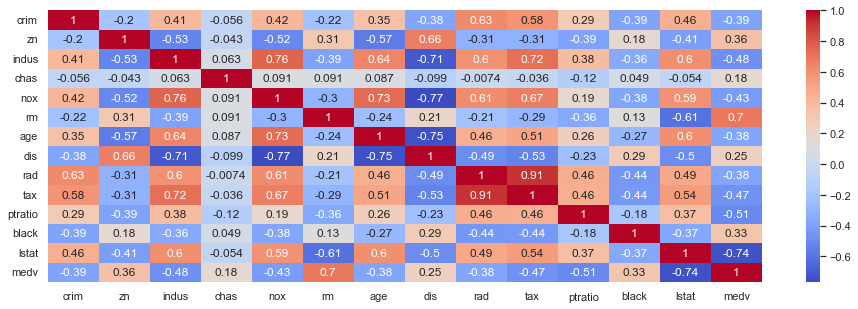

In [85]:
plt.figure(figsize = (16,5))

sns.heatmap(boston.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='lstat'>

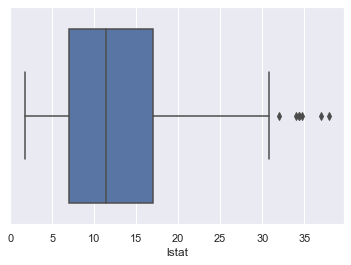

In [86]:
sns.boxplot(data=boston,x=boston['lstat'])

<AxesSubplot:xlabel='rm'>

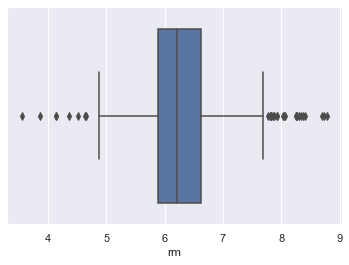

In [87]:
sns.boxplot(data = boston,x =boston['rm'])

In [88]:
q1=boston.quantile(0.25)
q3=boston.quantile(0.75)
IQR=q3-q1

Lower = q1-IQR
Upper = q3+IQR

In [89]:
Upper

crim          7.272120
zn           25.000000
indus        31.010000
chas          0.000000
nox           0.799000
rm            7.361500
age         143.125000
dis           8.276675
rad          44.000000
tax        1053.000000
ptratio      23.000000
black       417.072500
lstat        26.960000
medv         32.975000
dtype: float64

In [90]:
boston = boston[boston['lstat']<Upper['lstat']]
boston=boston[((boston['rm']>Lower['rm']) & (boston['rm']<Upper['rm']))]

In [91]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<AxesSubplot:xlabel='rm'>

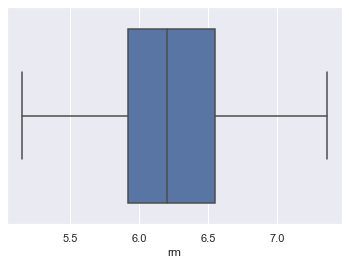

In [92]:
sns.boxplot(data=boston,x=boston['rm'])

In [93]:
boston_capped = boston.copy()

<AxesSubplot:xlabel='lstat'>

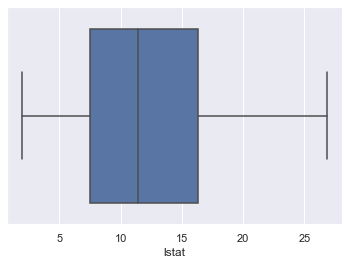

In [94]:
sns.boxplot(data=boston_capped,x=boston_capped['lstat'])

<AxesSubplot:xlabel='rm'>

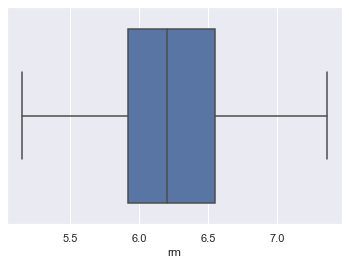

In [95]:
sns.boxplot(data=boston_capped,x=boston_capped['rm'])

## select dependent and independent variables

In [96]:
x = boston[['lstat','rm']]
y = boston['medv']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [99]:
reg = LinearRegression()

In [100]:
reg.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = reg.predict(X_test)

In [102]:
y_pred

array([29.29367458, 27.11426255,  8.03129785, 17.05066907, 13.16816447,
       24.20460518, 15.26989607, 27.70240262, 25.07722285, 18.17590088,
       26.71209755, 21.55075835, 28.0243201 , 20.5814722 , 15.68436351,
       22.70359504, 19.17400806, 25.25386972, 22.0275593 , 20.41314404,
       15.7152252 , 32.21762647, 20.36953925, 19.275709  , 20.88419908,
       16.39926968, 25.39269283, 29.27025643, 16.04747675, 25.53699477,
       29.42141711,  9.92452485, 22.21821034, 18.14319535, 22.55357251,
       24.44804303, 22.13041801, 19.75629114, 29.58694256, 30.3439176 ,
       11.02337981, 12.98588482, 20.4042095 , 26.26416255, 17.10272896,
       22.47724667, 25.15359362, 28.1485134 , 29.06266987, 17.67461754,
       16.77265449, 24.93337708, 20.61904072, 17.81605633, 28.71053389,
       12.0956533 , 28.06601286, 26.27188869, 22.81697484, 19.97838664,
       23.02397659, 22.06953465, 27.14050301, 20.29194253, 25.89625656,
       19.77517383, 17.9544584 , 31.32844939, 16.76714259, 18.58

In [103]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

#For intercept:
print(reg.intercept_)

#For slope:
print(reg.coef_)

3.158080432618516
6.820969869672048
[-0.78976633  3.92739169]


In [104]:
boston1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
boston1

,Actual,Predicted
308,22.8,29.293675
81,23.9,27.114263
408,17.2,8.031298
297,20.3,17.050669
378,13.1,13.168164
...,...,...
60,18.7,18.982698
149,15.4,11.862093
25,13.9,15.771394
18,20.2,19.016451


In [105]:
errors = abs(y_pred - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.55


In [106]:
mape = 100 * (errors / y_test)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 1), '%.')

Accuracy: 86.4 %.
